# Bayesian Methods Final Project
## Prince Birring & Brent Skoumal
## 04/17/2018

Import Statements and Style Preferences for matplotlib

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
sns.set(context="paper", font="monospace")

Get the compressed dataset and unzip it (you should have a kaggle api key)

In [69]:
!kaggle datasets download -d mirichoi0218/insurance -p .

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)



-

Read the data into a pandas dataframe, and inspect the first 5 rows

In [70]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Exploratory Data Analysis

In [71]:
df.shape

(1338, 7)

Text(0.5,1,'Probability Density Estimate of Charges')

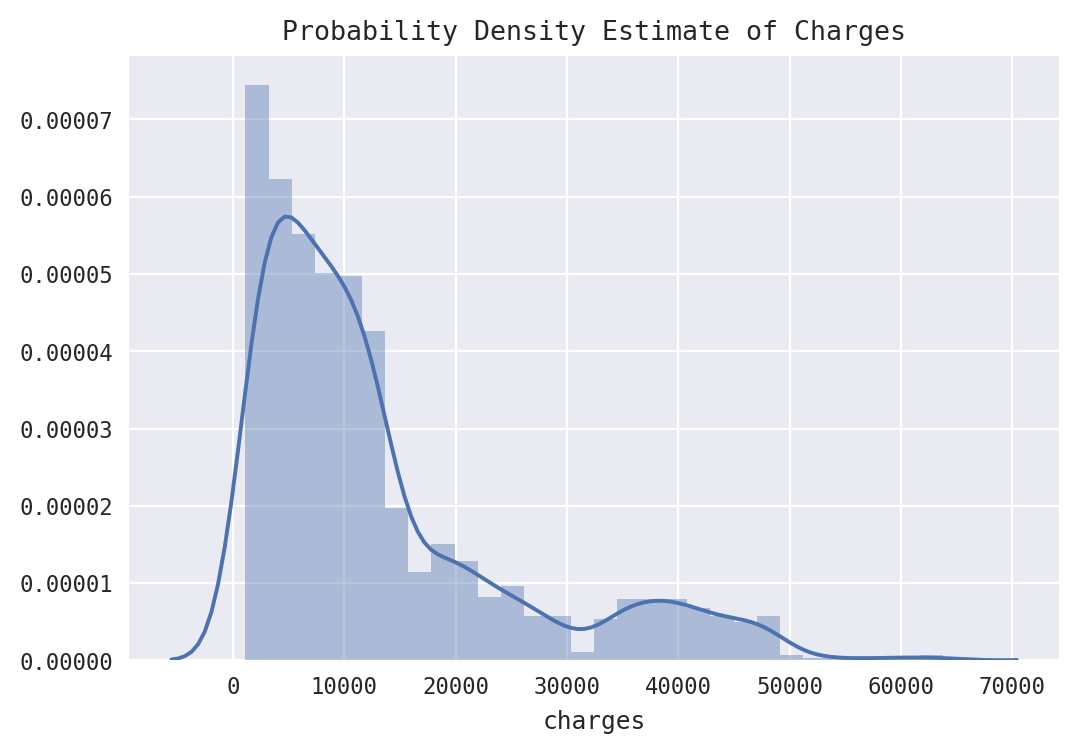

In [144]:
plt.figure(dpi=200)
sns.distplot(df.charges)
plt.title('Probability Density Estimate of Charges')

Text(0.5,1,'Probability Density Estimate of Body Mass Index')

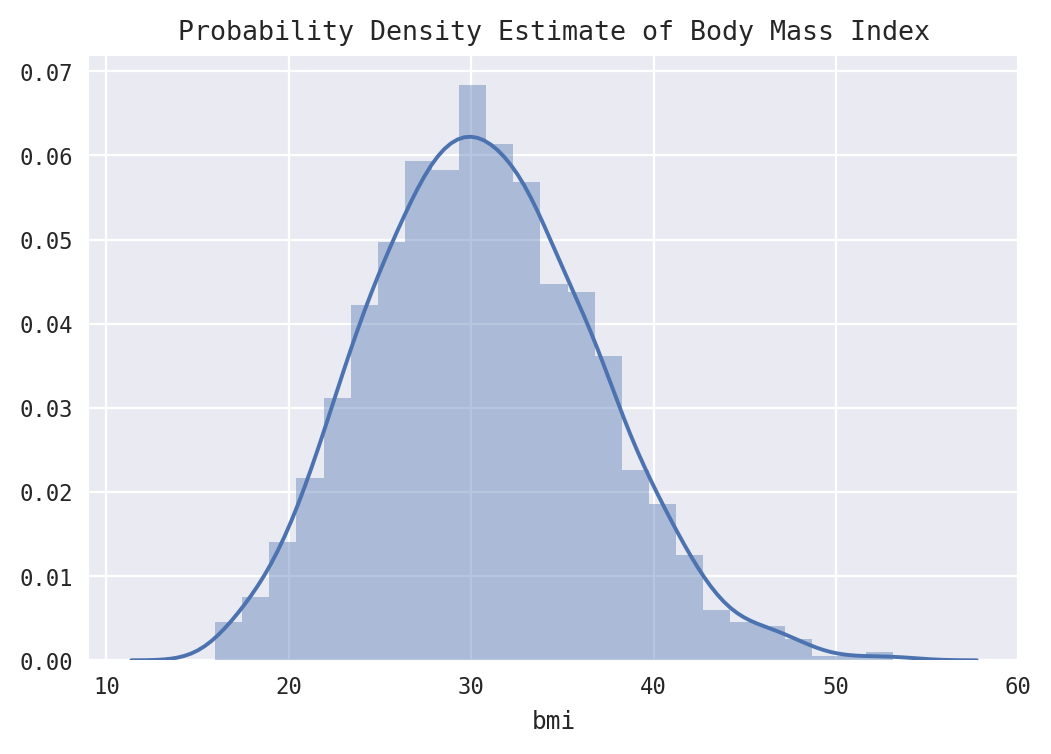

In [142]:
plt.figure(dpi=200)
sns.distplot(df.bmi)
plt.title('Probability Density Estimate of Body Mass Index')

Text(0.5,0,'Average Insurance Charges')

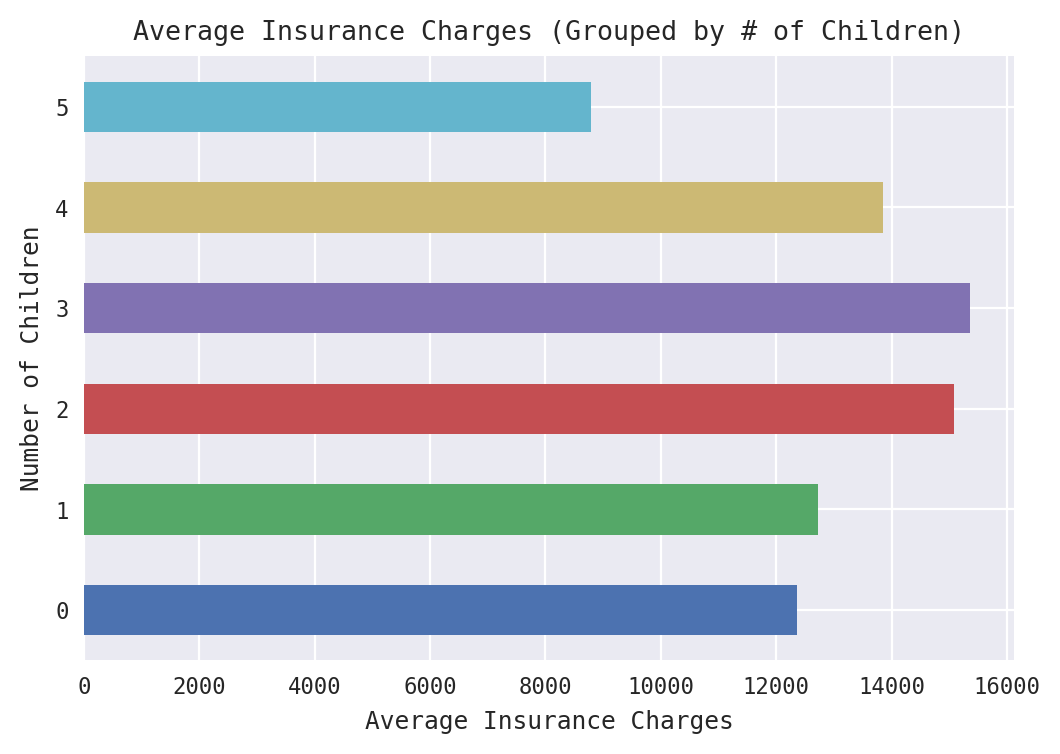

In [137]:
plt.figure(dpi=200)
df.groupby(['children']).mean()['charges'].plot.barh()
plt.title('Average Insurance Charges (Grouped by # of Children)')
plt.ylabel('Number of Children')
plt.xlabel('Average Insurance Charges')

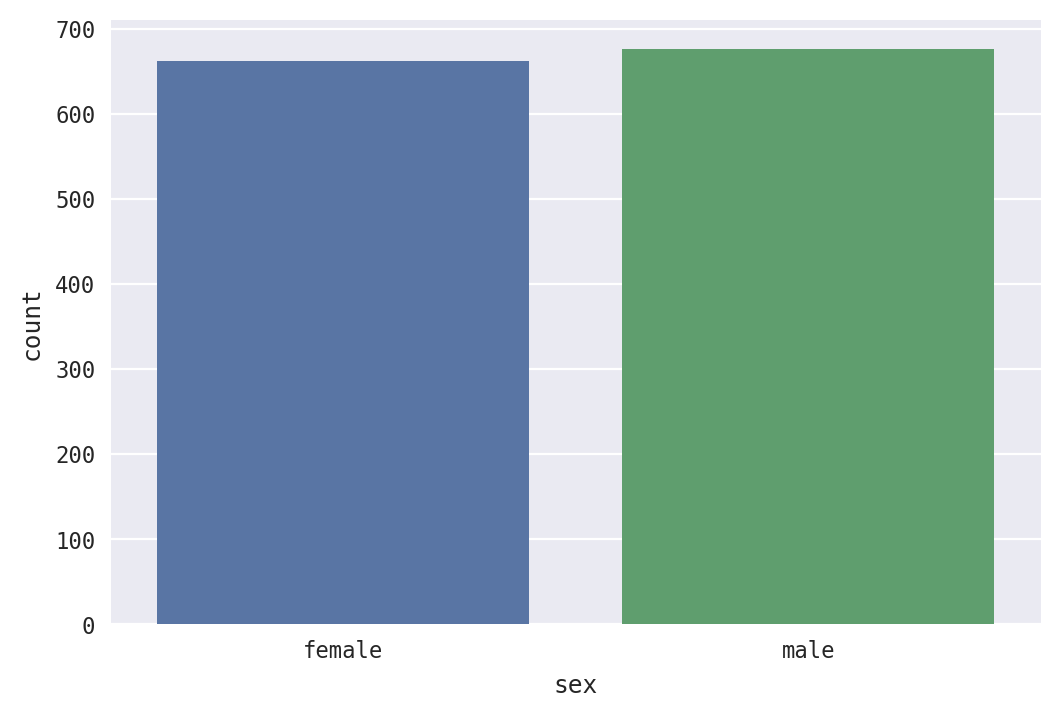

In [138]:
plt.figure(dpi=200)
sns.countplot(df.sex)

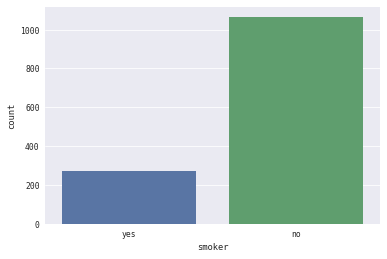

In [110]:
sns.countplot(df['smoker'])

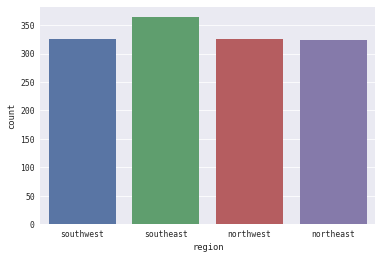

In [111]:
sns.countplot(df['region'])

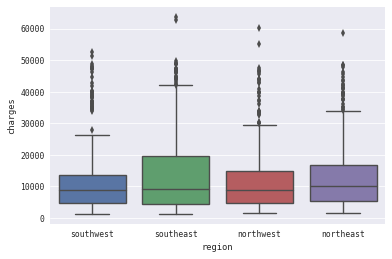

In [112]:
sns.boxplot(x = "region", y = "charges", data = df)

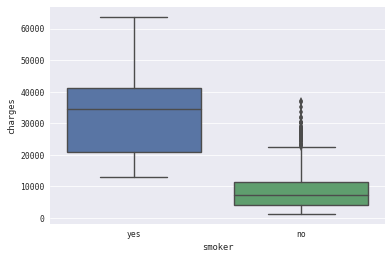

In [113]:
sns.boxplot(x = "smoker", y = "charges", data = df)

In [120]:
df.groupby(['region']).mean()['charges']

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

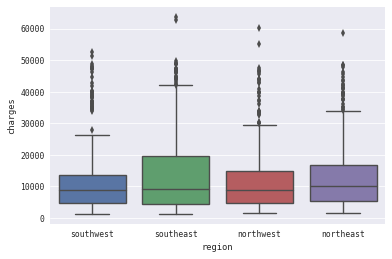

In [114]:
sns.boxplot(x = "region", y = "charges", data = df)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

# Investigation of Age

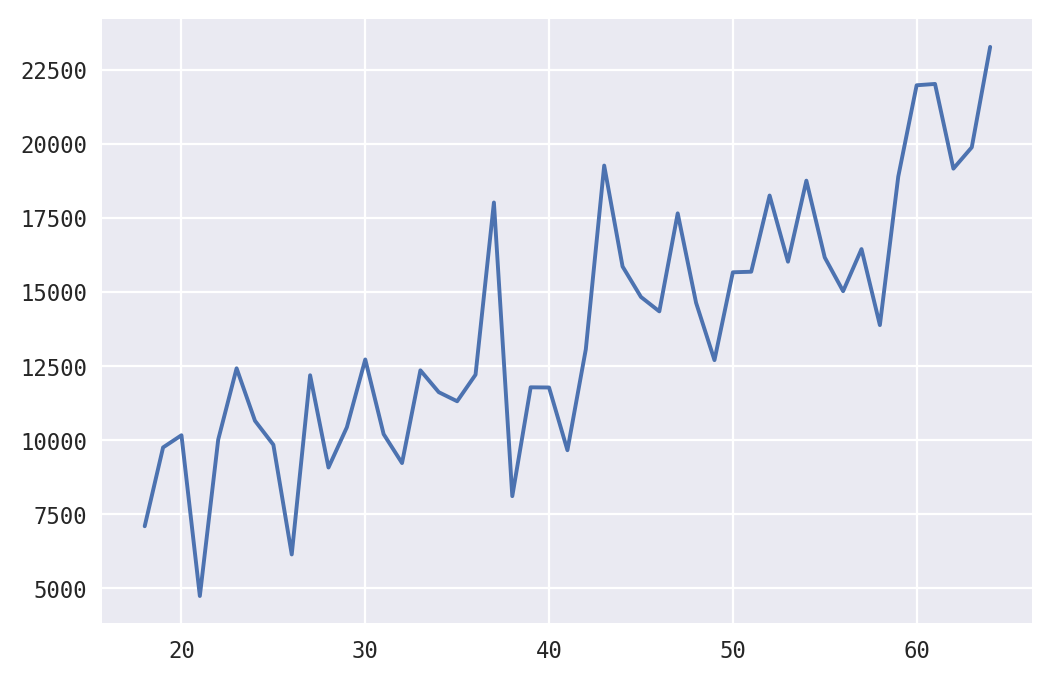

In [152]:
plt.figure(dpi=200)
ages = df.groupby('age')['charges'].mean().index
avg_charges = df.groupby('age')['charges'].mean().values
plt.plot(ages, avg_charges)

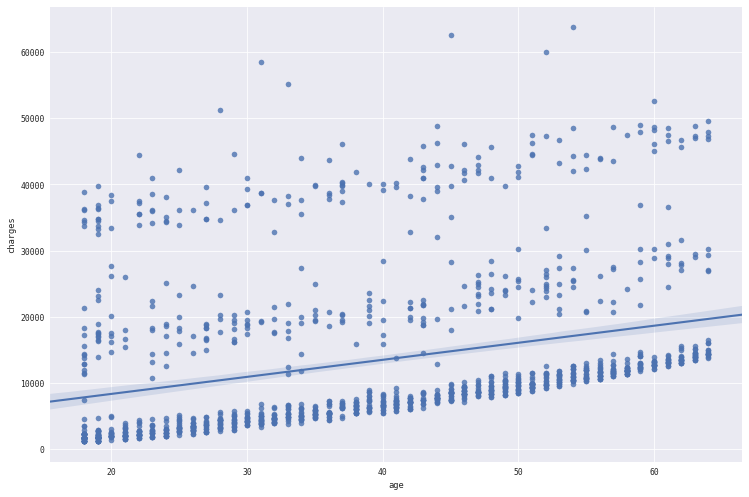

In [162]:
plt.figure(dpi=200)
sns.lmplot('age','charges', data=df,size=7, aspect = 1.5);

# Investigation of Smoking

In [160]:
df.groupby(['smoker']).mean()['charges']

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

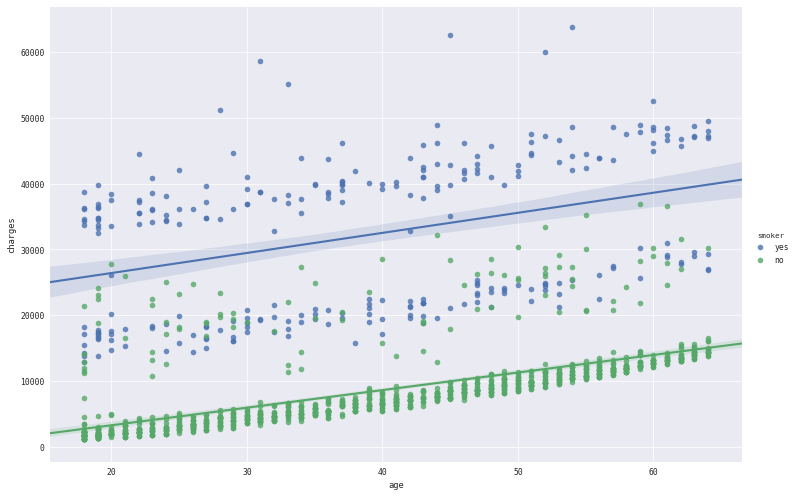

In [118]:
sns.lmplot('age','charges',data=df,size=7,hue='smoker',aspect=1.5)

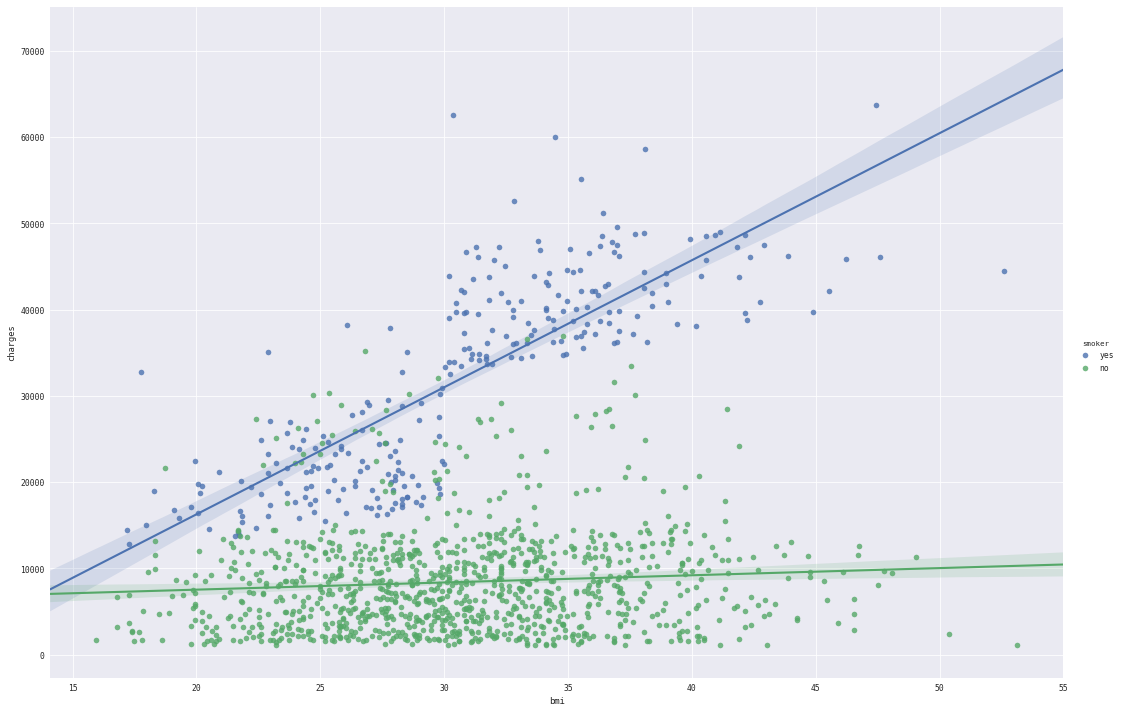

In [163]:
sns.lmplot('bmi', 'charges', data=df, size=10,hue='smoker',aspect=1.5);

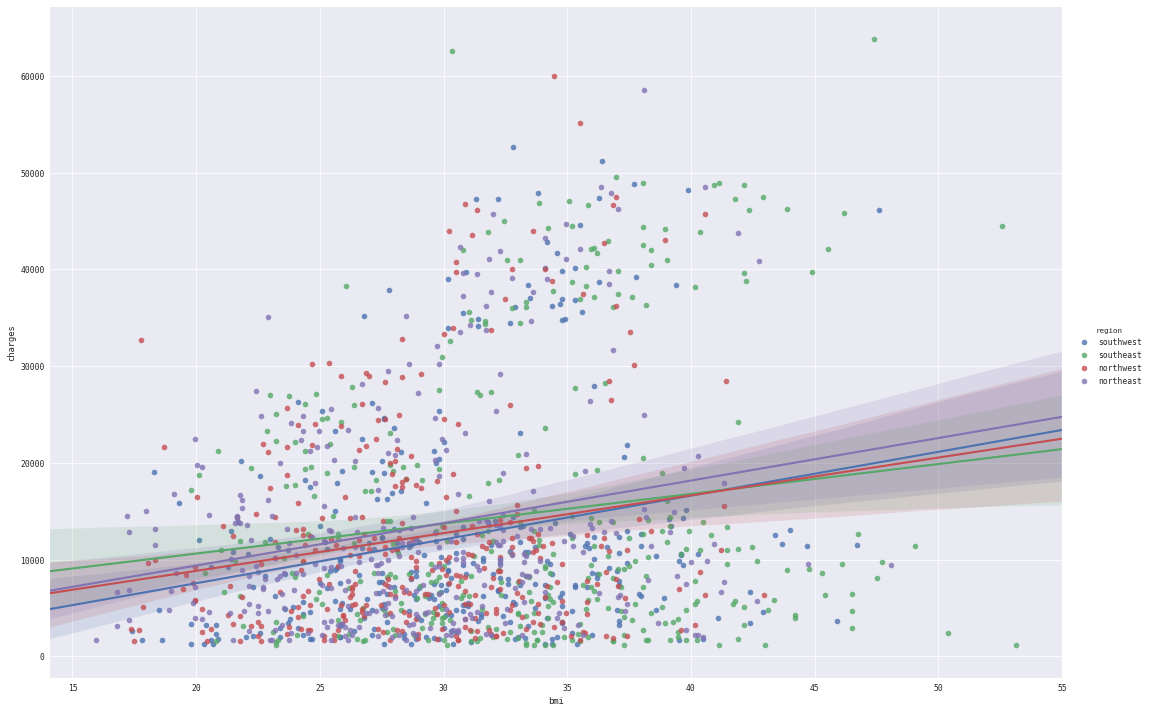

In [167]:
p = sns.lmplot('bmi', 'charges', data=df, size=10,hue='region',aspect=1.5)

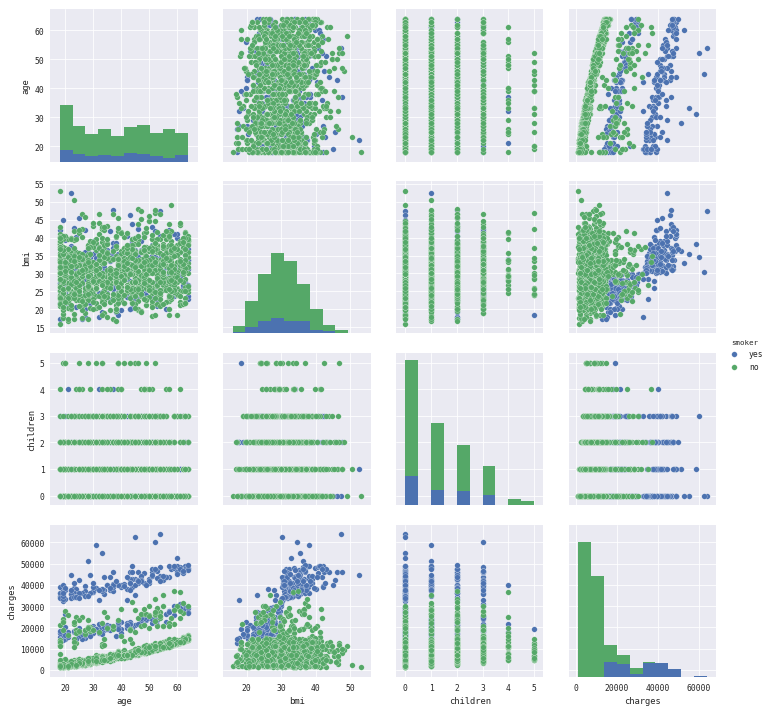

In [168]:
sns.pairplot(df,hue='smoker')

In [ ]:
#Heat Map to see the correlation between diffrent variables
#Find the correlation between the different varaibles in the datasets
cormat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(12, 9))

#Draw the heatmap using seaborn
colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)
plt.show()

In [ ]:
df = pd.read_csv("insurance.csv")
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['sex'] = df['sex'].map({'male':1,'female':0})
df=pd.get_dummies(df)
#Heat Map to see the correlation between diffrent variables
#Find the correlation between the different varaibles in the datasets
cormat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(12, 9))

#Draw the heatmap using seaborn
colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)
plt.show()
df.head()

In [ ]:
df = pd.read_csv("insurance.csv")
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['sex'] = df['sex'].map({'male':1,'female':0})
df=pd.get_dummies(df)

X = df.drop('charges', axis = 1)
y = df['charges']

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X,y)
feat_imp = clf.feature_importances_
feat_imp_series = pd.Series(feat_imp,X.columns)
feat_imp_series.sort_values().plot(kind='bar')

We can conclude that region is not needed and isn't particularly valuable for predicting charges, we'll re-read the df and encode our binary variables and drop 'region'

In [ ]:
df = pd.read_csv("insurance.csv")
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['sex'] = df['sex'].map({'male':1,'female':0})
df.drop('region',axis=1)

y = df['charges']
X = df.drop(['charges','region'], axis=1)



clf = RandomForestRegressor()
clf.fit(X,y)
feat_imp = clf.feature_importances_
feat_imp_series = pd.Series(feat_imp, X.columns)
feat_imp_series.sort_values().plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X_train2 = sm.add_constant(X_train)
linearModel = sm.OLS(y_train, X_train2)
linear = linearModel.fit()
print(linear.summary())

# MCMC

In [ ]:
beta0 = pm.Normal("beta0", 0, 0.0001)
noise = pm.Uniform("noise", 0, 500)

In [ ]:
b = np.empty(5, dtype=object)
x = np.empty(5, dtype=object)

In [ ]:
b1 = pm.Normal("b1", 0, 0.0001); b[1] = b1
b2 = pm.Normal("b2", 0, 0.0001); b[2] = b2
b3 = pm.Normal("b3", 0, 0.0001); b[3] = b3
b4 = pm.Normal("b4", 0, 0.0001); b[4] = b4

In [ ]:
x1 = pm.Normal("x1", 0, 1, df['smoker'], observed=True)
x[1] = x1
x2 = pm.Normal("x2", 0, 1, df['bmi'], observed=True)
x[2] = x2
x3 = pm.Normal("x3", 0, 1, df['age'], observed=True)
x[3] = x3
x4 = pm.Normal("x4", 0, 1, df['children'], observed=True)
x[4] = x4

In [ ]:
@pm.deterministic
def pred(beta0 = beta0, b = b, x = x):
    return beta0 + b[1]*x[2] + b[2]*x[2] + b[3]*x[3] + b[4]*x[4]

In [ ]:
y = pm.Normal("y", pred, noise, value = np.array(df['charges']), observed = True)

model = pm.Model([beta0, pm.Container(b), noise, pm.Container(x), y, pred])

In [ ]:
import pydot
import pymc.graph
from IPython.display import display_png

In [ ]:
graph = pm.graph.graph(model)
display_png(graph.create_png(), raw = True)

In [ ]:
mcmc = pm.MCMC(model)
mcmc.sample(100000, 200)

In [ ]:
mcmc.trace()

In [ ]:
#multifig, multiax = plt.subplots(2, 1, figsize=(10, 10))
b0_val = np.mean(mcmc.trace('beta0')[:])
plt.hist(mcmc.trace('b1')[:], bins=100)

b1_val = np.mean(mcmc.trace('b1')[:])
plt.hist(mcmc.trace('b1')[:], bins=100)

b4_val = np.mean(mcmc.trace('b4')[:])
plt.hist(mcmc.trace('b4')[:], bins=100)

b3_val = np.mean(mcmc.trace('b3')[:])
plt.hist(mcmc.trace('b3')[:], bins=100)

b2_val = np.mean(mcmc.trace('b2')[:])
plt.hist(mcmc.trace('b2')[:], bins=100)

plt.show()

In [ ]:
print("B0: " + str(np.mean(b0_val)))
print("B1: " + str(np.mean(b1_val)))
print("B2: " + str(np.mean(b2_val)))
print("B3: " + str(np.mean(b3_val)))
print("B4: " + str(np.mean(b4_val)))

In [ ]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_bmi, y)
prediction_space = np.linspace(min(X_bmi), max(X_bmi)).reshape(-1, 1)
plt.scatter(X_bmi, y, color = "blue")
plt.plot(prediction_space ,reg.predict(prediction_space), color = "black", 
         linewidth=3)
plt.show()

In [ ]:
## BMI
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
## BMI + AGE
X_bmi_age = df[['bmi','age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi_age, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
## Bmi + Age + Children
X_bmi_age_child = df[['bmi', 'age', 'children']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi_age_child, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
# Bmi + Age + Smoke
X_bmi_age_child = df[['bmi', 'age', 'smoker_no','smoker_yes']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi_age_child, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
# All the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

In [ ]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [ ]:
linear_regression(X_bmi, y)